### Procrustes

Guilherme Franca (guifranca@gmail.com) 08/21/2016

Procustes is a statistical method to analyse the distribution of shapes. It compares two objects by superimposing them through translation, rotation, and scaling (and possibly reflection). These are orthogonal transformations.

Consider a set of 2D points $I = \{ (x_i, y_i) \}$, $i=1,\dotsc,n$. Then one can performs the following transformations.

**Translation + Scaling.** Let
$$
\bar{x} = \dfrac{1}{n}\sum_{i=1}^n x_i, \qquad
\bar{y} = \dfrac{1}{n}\sum_{i=1}^n y_i
$$
and 
$$
s^2 = \dfrac{1}{n} \sum_{i=1}^n \left\{ (x_i-\bar{x})^2 + (y_i - \bar{y})^2 \right\}
$$
Then one performs
$$
x_i \to \dfrac{x_i - \bar{x}}{s}, \qquad y_i \to \dfrac{y_i - \bar{y}}{s}
$$
This transformation translates the points to the origin and set the size of the object to $s=1$.

**Rotation.** Let $J = \{ (w_i, z_i) \}$, for $i=1,\dotsc,n$. One rotates $J$ as
$$
\begin{pmatrix} u_i \\ v_i \end{pmatrix} = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} \begin{pmatrix} w_i \\ z_i \end{pmatrix}
$$
and minimizes the objective
$$
\sum_{i=1}^n (u_i - x_i)^2 + (v_i - y_i)^2
$$
This yields
$$
\tan\theta = \dfrac{\sum_{i=1}^n (w_i y_i - z_i x_i)}{\sum_{i=1}^n (w_i x_i + z_i y_i)}
$$

**Distance.** After the above transformations were performed the distance between two shapes is then given by
$$
d^2(J, I) = \sum_{i=1}^n \big\{(u_i - x_i)^2 + (v_i - y_i)^2 \big\}
$$
This is usually called Procustes distance.

Above we are comparing only two objects. For a set of objects one finds a reference object from which the other objects are superimposed to. The algorithm is:

1. Arbitrarily choose a reference shape $I_0$.
2. Superimpose all objects to $I_0$.
3. Compute the mean shape $\bar{I}$ of the current set of superimposed shapes.
4. If $d^2(\bar{I}, I_0) > c$, for some constant $c$, set $I_0 = \bar{I}$ and continue from step 2 above.

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn import datasets
from sklearn import metrics

import kmedoids
import kmeans
import distance
import clusval

golden = (1+np.sqrt(5))/2

In [31]:
digits = datasets.load_digits()
images = digits.images

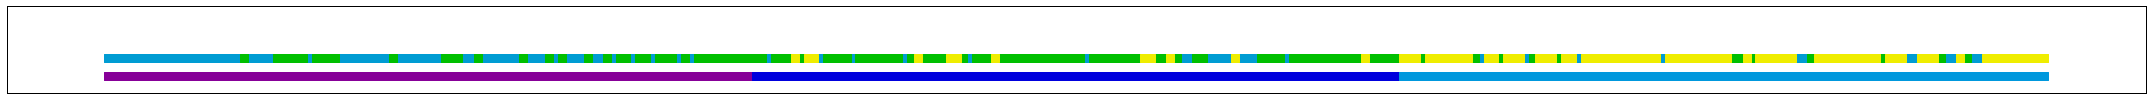

In [35]:
# picking some digits
n = [100, 100, 100]
d = [1, 5, 8]
labels = np.concatenate([[i]*x for i, x in enumerate(n)])

data = np.concatenate([images[np.where(digits.target==i)][:m] for i, m in zip(d, n)])

coords = np.array([i for i in range(len(data))])

D = kmedoids.procrustes_distance(data)

J, M = kmedoids.kmedoids(len(n), D)

fig = plt.figure(figsize=(30,1.5))
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])

s = 50
cc = cm.spectral(np.linspace(0.1, 0.3, len(n)))
for k in range(len(n)):
    idx = np.where(labels==k)[0]
    ax.scatter(coords[idx], [0]*len(idx), color=cc[k], s=s, marker='s')

cc = cm.spectral(np.linspace(0.31, 0.7, len(n)))
for k in range(len(n)):
    idx = np.where(J==k)[0]
    ax.scatter(coords[idx], [1]*len(idx), color=cc[k], s=s, marker='s')
    
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(-1, 4)
fig.tight_layout()

In [37]:
print metrics.mutual_info_score(labels, J)
print clusval.misclassification_error(labels, J)

0.367647932419
0.296666666667


In [50]:
numbers = [4, 2, 7]
nrange = range(10, 170, 10)
kmedoids_euclidean_metric, kmedoids_procrustes_metric, kmeans_sklearn_metric = clusval.MNIST_eval2(clusval.misclassification_error, numbers, nrange, num_avg=3)

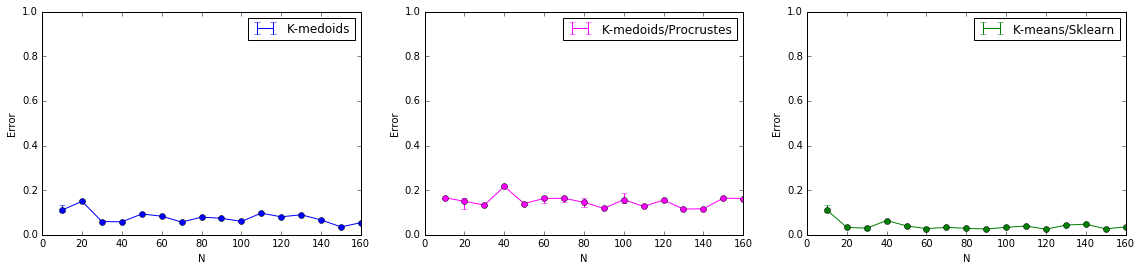

In [51]:
def errplot(ax, xs, data, label, color, ylabel, yrange=[0,1]):
    a = np.array(data)
    mean = a[:,0]
    lower = mean - a[:,1]
    upper = a[:,2] - mean
    error = [lower, upper]
    ax.errorbar(xs, mean, yerr=error, label=label, color=color, ls='solid')
    ax.plot(xs, mean, 'o', color=color)
    ax.set_ylim(yrange)
    ax.set_xlabel('N')
    ax.set_ylabel(ylabel)
    ax.legend(loc=0)

fig = plt.figure(figsize=(4*golden*3,4))
ax = fig.add_subplot(131)
errplot(ax, nrange, kmedoids_euclidean_metric, 'K-medoids', 'blue', 'Error')
ax1 = fig.add_subplot(132, sharex=ax)
errplot(ax1, nrange, kmedoids_procrustes_metric, 'K-medoids/Procrustes', 'magenta', 'Error')
ax2 = fig.add_subplot(133, sharex=ax)
errplot(ax2, nrange, kmeans_sklearn_metric, 'K-means/Sklearn', 'green', 'Error')